In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import csv
import re

# find optimal value of k for k-means
data = pd.read_csv("../Data/final_data.csv", delimiter=',')
#data.head()

def find_indexes(questions, labels):
    indexes = []
    for label in labels:
        for question in questions:
            if re.search(question, label):
                indexes.append(label)
    return indexes

begeleiding_index = find_indexes(['Q8', 'Q9', 'Q10', 'Q11', 'Q12'], data.columns)
location_time_index = find_indexes(['Q13', 'Q14', 'Q15', 'Q16'], data.columns)
apps_index = find_indexes(['Q42', 'Q43', 'Q44', 'Q45', 'Q46'], data.columns)

all_data = data.values
begeleiding = data[begeleiding_index].values
location_time = data[location_time_index].values
apps = data[apps_index].values

array([[False, False, False, ..., 0, 1, 0],
       [False, False, False, ..., 0, 0, 0],
       [True, False, False, ..., 0, 0, 1],
       ...,
       [True, False, False, ..., 0, 0, 1],
       [True, False, False, ..., 0, 0, 1],
       [True, False, False, ..., 0, 0, 1]], dtype=object)

In [54]:
def elbow_method(X, label):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        #Sum of squared distances of samples to their closest cluster center.
        Sum_of_squared_distances.append(km.inertia_) 

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('The Elbow Method showing the optimal k for %s'%(label))
    plt.show()

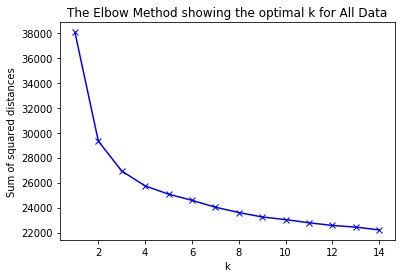

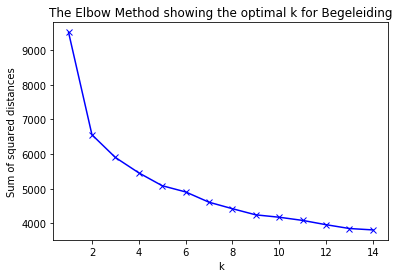

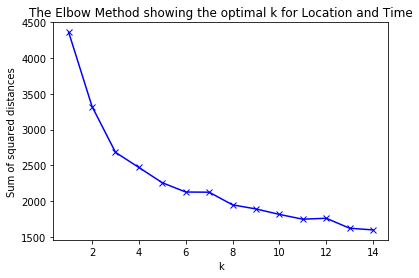

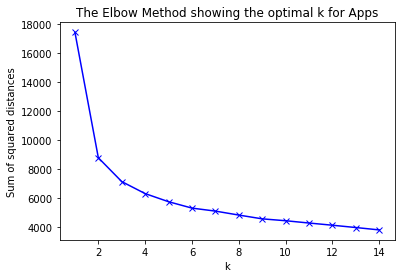

In [55]:
elbow_method(all_data, "All Data")
elbow_method(begeleiding, "Begeleiding")
elbow_method(location_time, "Location and Time")
elbow_method(apps, "Apps")

In [23]:
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_
for i in labels:
    i = int(i)
print(labels)

[2 1 1 ... 1 1 0]


In [32]:
np.savetxt("kmeans_cluster_all.csv", labels, fmt='%0.0f', delimiter=",")